# Starter point for the Machine Learning element of the coursework

This part of the coursework uses the same dataset as used in the first part of the coursework. In this part of the coursework you are going to develop three machine learning models for predicting the **'median_house_value'** from the dataset. The focus here is on comparing the different models and looking at how you can improve them. You do not need to use a cleaned up version of the data (i.e. perform outlier removal in advance) but you may if you wish although please comment on this.

Everything needed to complete this assignment should be available in the course slides, but external information from the interenet may prove useful and is encouraged. Please provide citations for resources used in the course. 

### Load libraries and read in data

In [1]:
import pandas as pd
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

### (Optional) Preprocessing and Data Exploration
What data exploration would you perform to get a sense of the data, and what preprocessing outside of feature normalasation would you perform? This section is an optional place for students to do additional work on the data before progressing into the assignment proper.

       median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   20640.000000        20640.000000  20640.000000   
mean        206855.816909       3.870671           28.639486   2635.763081   
std         115395.615874       1.899822           12.585558   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.563400           18.000000   1447.750000   
50%         179700.000000       3.534800           29.000000   2127.000000   
75%         264725.000000       4.743250           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1425.476744    499.539680     35.631861   -119.569704  
std        421.247906   1132.462122    382.329753      2.

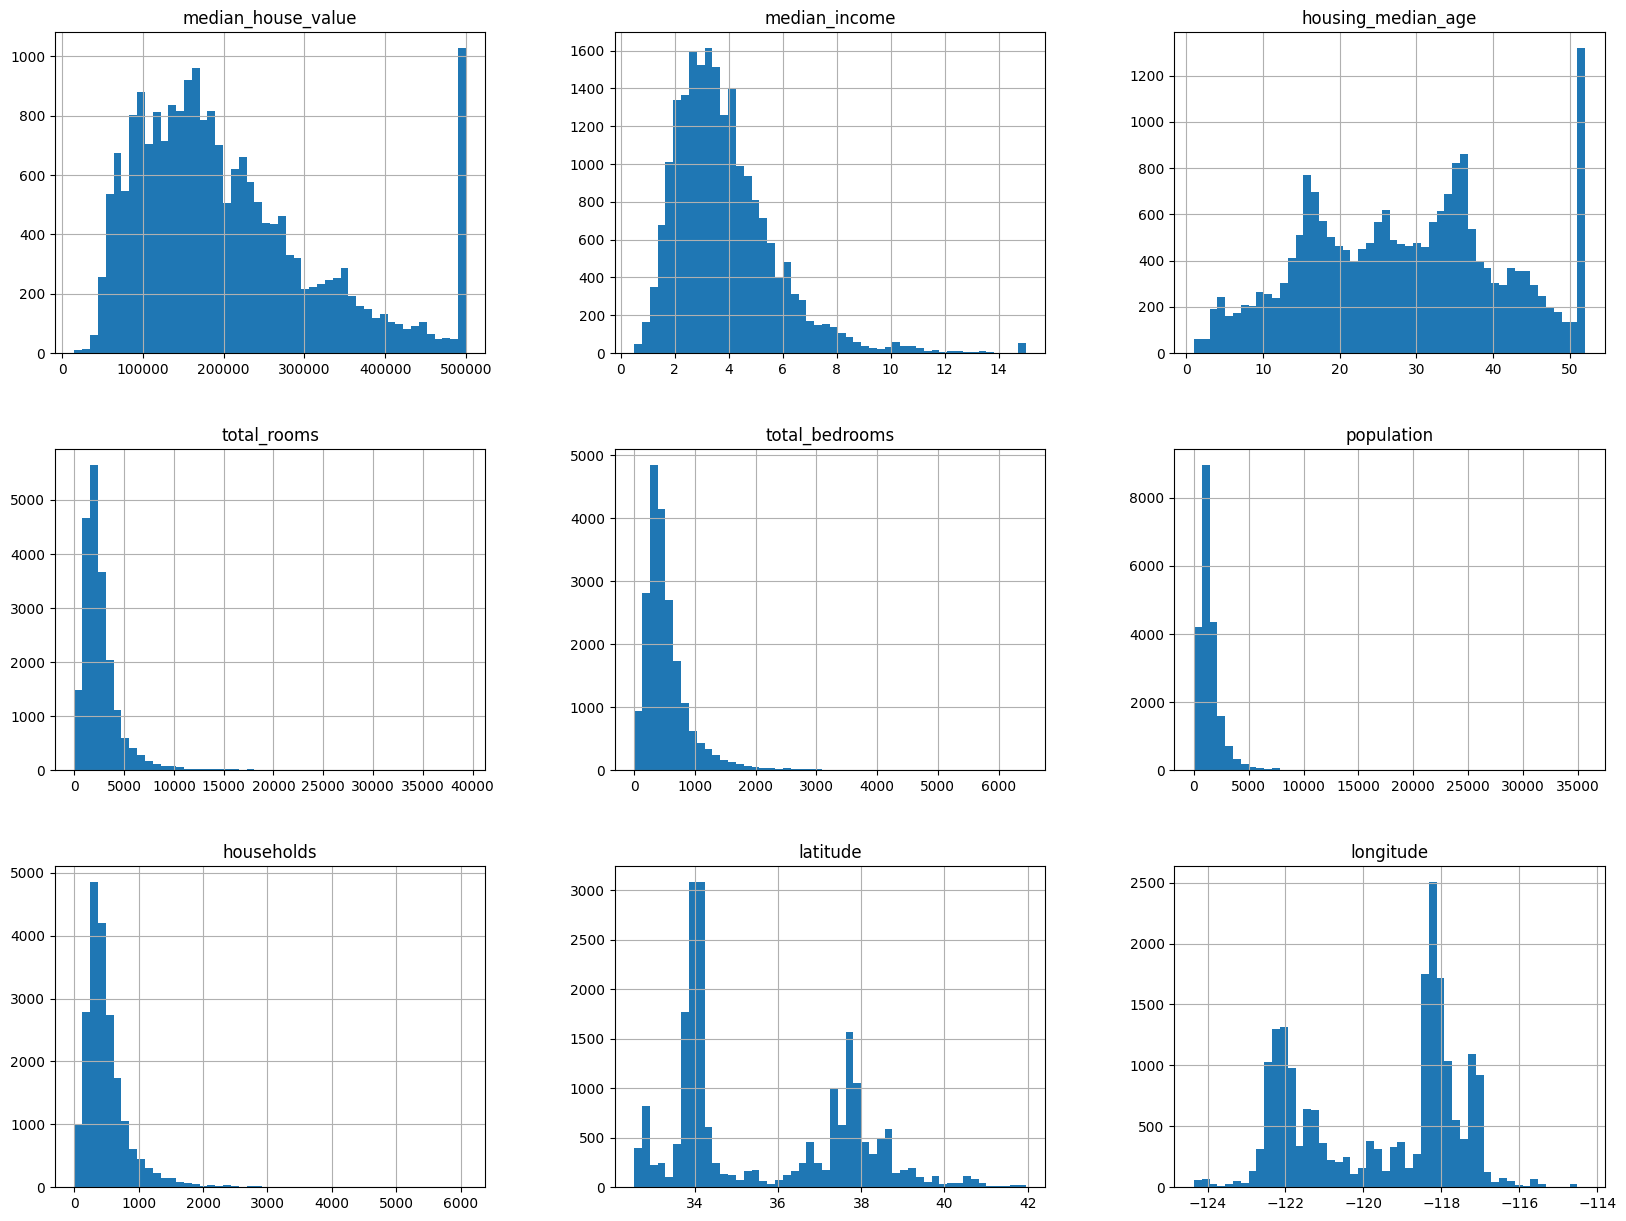

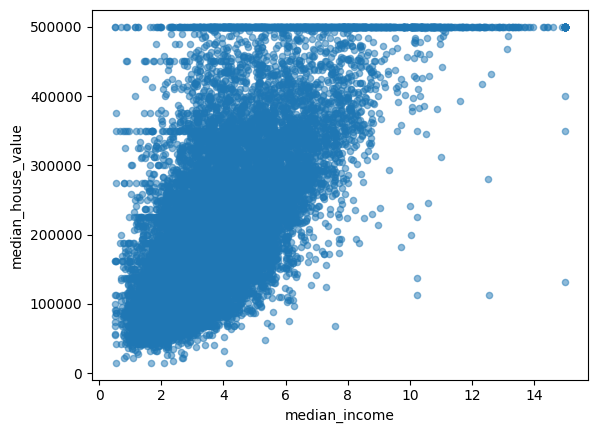

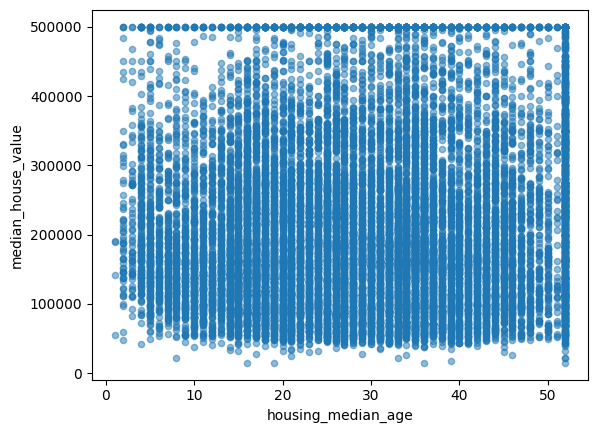

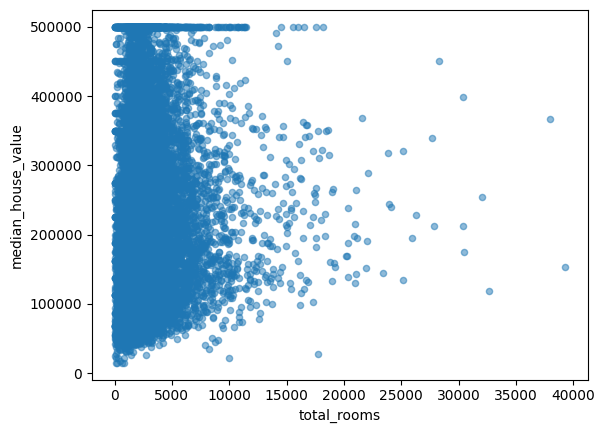

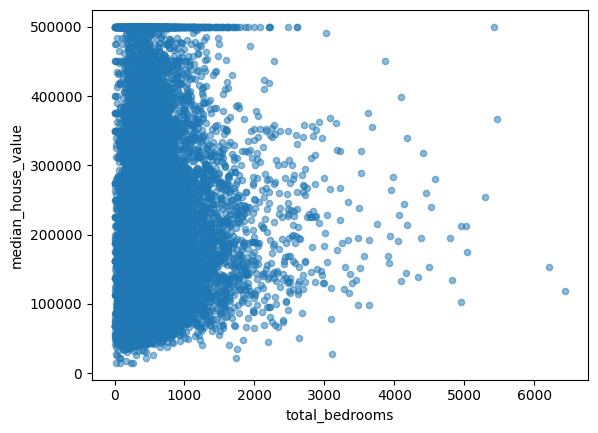

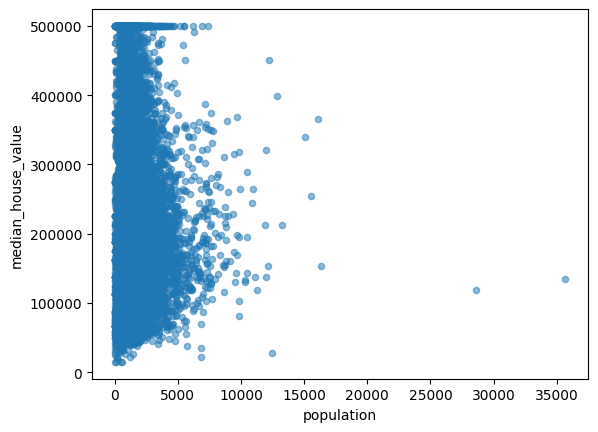

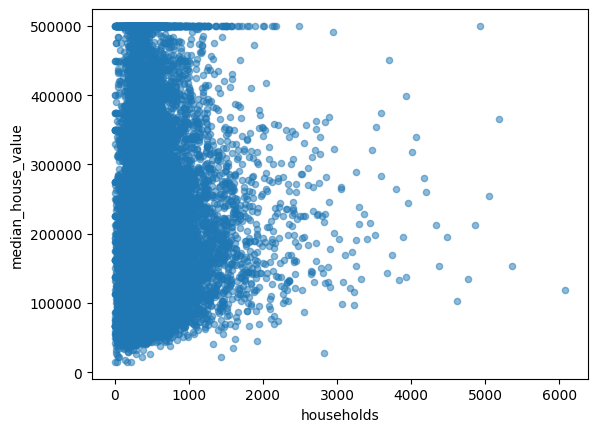

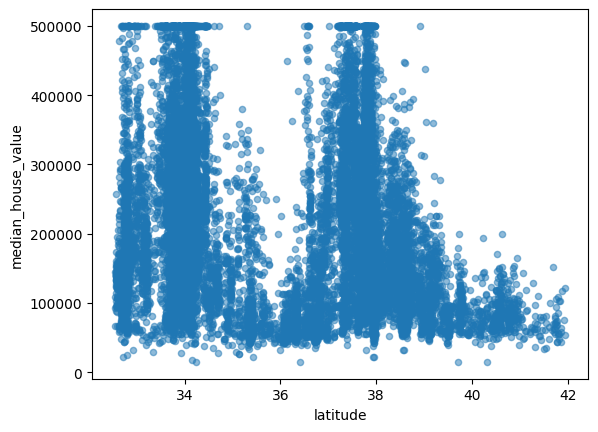

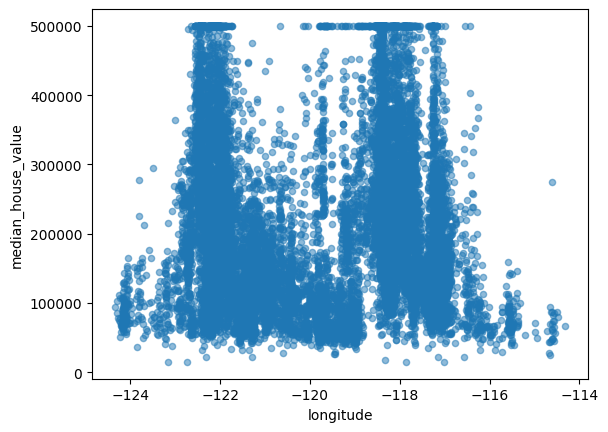

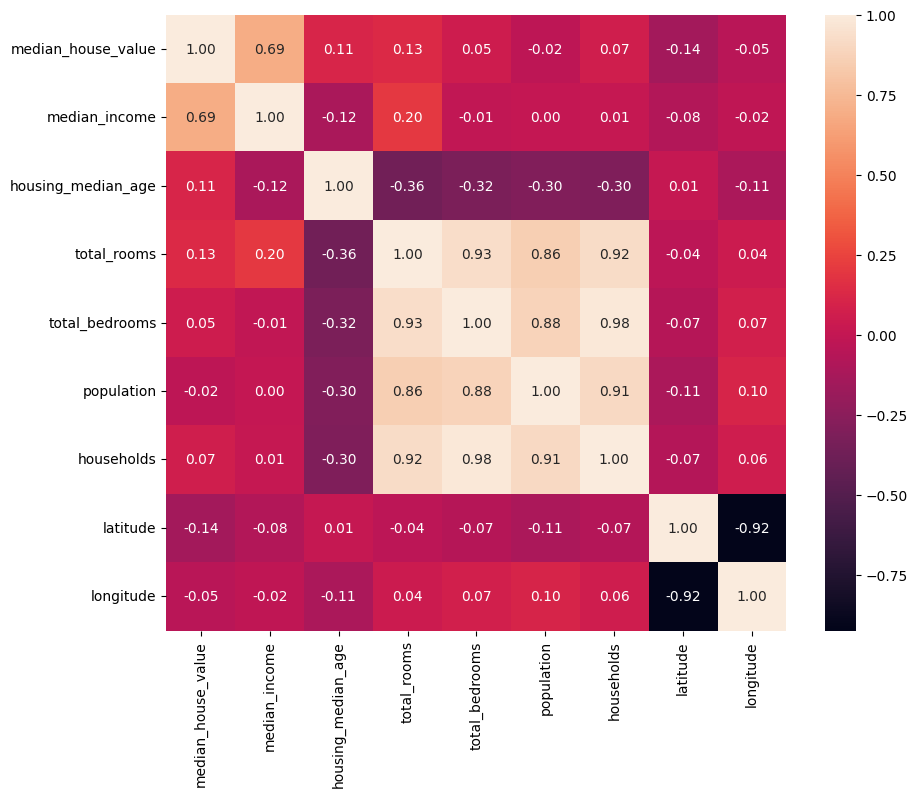

median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64
       median_house_value  median_income  housing_median_age  total_rooms  \
131              392600.0        11.6017                18.0       1617.0   
409              397000.0        10.0825                52.0       2003.0   
510              500001.0        11.8603                39.0       2492.0   
511              500001.0        13.4990                42.0       2991.0   
512              500001.0        12.2138                52.0       3242.0   
...                   ...            ...                 ...          ...   
20376            410800.0        10.2614                16.0       1509.0   
20380            500001.0        10.1597                16.0       1316.0   
20389            500001.0        10.0595                26.0       1582.0   
2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic descriptive statistics
print(houses.describe())

# Rationale: Descriptive statistics provide a quick overview of the data, 
# helping to understand the range, central tendency, and spread of each feature.

# Plot histograms for each numerical feature
houses.hist(bins=50, figsize=(20,15))
plt.show()

# Rationale: Histograms help in understanding the distribution of each feature. 
# It can reveal skewness, outliers, and the overall spread of the data.

# Scatter plot for each feature against the median house value
for column in houses.columns:
    if column != 'median_house_value':
        houses.plot(kind='scatter', x=column, y='median_house_value', alpha=0.5)

# Rationale: Scatter plots are useful to observe the relationship between features and the target variable. 
# This can help in identifying patterns, trends, and potential outliers.

# Correlation matrix
corr_matrix = houses.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Rationale: A correlation matrix visualized as a heatmap helps to identify 
# how features are related to each other and to the target variable.

# Check for missing values
print(houses.isnull().sum())

# Rationale: Identifying missing values is crucial as they can affect the performance 
# of machine learning models. Deciding how to handle them is an important part of preprocessing.

# Outlier detection (example using Z-score for a single feature)
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(houses['median_income']))
outliers = houses[z_scores > 3]
print(outliers)

# Rationale: Outliers can skew the results of your analysis and model performance. 
# Detecting and treating them is essential for a robust model.


## Data Preparation
In this section you will perform feature selection, feature normalisation, and provide a rationale for your actions. 

### Feature Selection
Think about which features may be useful in predicting **'median_house_value'**, are all features in the provided data set useful? Is a subset all that's needed? What techniques can you utilise to make this determination?

In [3]:
# 1.Correlation Analysis 
# Correlation with target variable
corr_with_target = houses.corr()['median_house_value'].sort_values(ascending=False)
print("Correlation with 'median_house_value':\n", corr_with_target)

# Rationale: This step helps identify features that have a strong linear relationship with the target variable.


# 2.Feature Importance using a Model
from sklearn.ensemble import RandomForestRegressor

# Preparing data for feature importance
X = houses.drop('median_house_value', axis=1)
y = houses['median_house_value']

# Fitting a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Displaying feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("\nFeature Importances:\n", feature_importances)

# Rationale: Feature importance from a model like Random Forest gives us an empirical basis to select features.


# 3.Multicollinearity Check
# Checking for multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVIF Scores:\n", vif_data)

# Rationale: High VIF scores (typically VIF > 5) indicate multicollinearity which should be addressed before modelling.


Correlation with 'median_house_value':
 median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.050594
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Feature Importances:
 median_income         0.513684
longitude             0.161401
latitude              0.154015
housing_median_age    0.065261
population            0.035064
total_bedrooms        0.026500
total_rooms           0.024121
households            0.019954
dtype: float64

VIF Scores:
               feature         VIF
0       median_income    8.246995
1  housing_median_age    7.293454
2         total_rooms   30.330820
3      total_bedrooms   94.239447
4          population   16.457550
5          households   91.737819
6            latitude  549.732353
7           longitude  616.205226


### Feature Normalisation
Think about what normalisation/standardisation methods you should apply to the dataset given what you understand about the raw data.

In [4]:
from sklearn.preprocessing import StandardScaler

# Selected features
selected_features = ['median_income', 'housing_median_age']

# Extracting the selected features
X_selected = houses[selected_features]

# Applying StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_selected)

# Checking the transformed features
print("Normalized Features:\n", X_normalized[:5])  # Displaying first 5 rows

# Rationale: By standardizing 'median_income' and 'housing_median_age', 
# we ensure they contribute equally to the model without being skewed by their original scale.
# This is crucial for distance-based algorithms and helps in speeding up gradient descent in others.


Normalized Features:
 [[ 2.34476576  0.98214266]
 [ 2.33223796 -0.60701891]
 [ 1.7826994   1.85618152]
 [ 0.93296751  1.85618152]
 [-0.012881    1.85618152]]


### Rationale
Provide your rationale for both Feature Selection and Feature Normalisation here.

## <ins>Rationale for Feature Selection</ins>

**1. Correlation with Target Variable:**
- The decision to prioritize 'median_income' is based on its strong positive correlation with 'median_house_value'. A high correlation indicates a strong linear relationship, suggesting that 'median_income' is likely a significant predictor of house values.
- 'Housing_median_age' was also selected due to its moderate positive correlation with the target variable, indicating its potential relevance in predicting house values.

**2. Random Forest Feature Importance:**
- The Random Forest model identified 'median_income' as the most important feature, reinforcing its selection based on   correlation analysis.
- Although 'longitude' and 'latitude' were also identified as important, they were excluded due to extreme multicollinearity, which could destabilize the model and make the interpretation of model coefficients challenging.

**3. Variance Inflation Factor (VIF):**
- 'Latitude' and 'longitude' had very high VIF scores, indicating significant multicollinearity. Including these features could have led to issues in the regression model, such as inflated standard errors and reduced precision in estimating coefficients.
- 'Total_rooms', 'total_bedrooms', 'population', and 'households' also exhibited high multicollinearity, leading to their exclusion despite their moderate importance in the Random Forest analysis.

**4. Simplification and Efficiency:**
-  By selecting a smaller subset of features, the model complexity is reduced. This can lead to easier interpretation, faster training times, and potentially better generalization on unseen data.

***

## <ins>Rationale for Feature Normalization</ins>

**1. Standardization (Z-score Normalization):**
- The selected features ('median_income' and 'housing_median_age') had different scales and units. Standardization addresses this by rescaling the features to have a mean of 0 and a standard deviation of 1.
- This rescaling is crucial for models that rely on distance calculations (like K-Nearest Neighbors and SVM) and helps in speeding up the convergence of gradient descent algorithms used in models like Linear Regression and Neural Networks.
- Standardization is less sensitive to outliers compared to Min-Max Scaling, making it a suitable choice given the presence of outliers in features like 'median_income'.

**2. Equal Contribution:**
- By normalizing the features, we ensure that each feature contributes equally to the model's predictions. This prevents features with larger magnitude from dominating those with smaller magnitude, leading to a more balanced and fair contribution from each feature.

**3. Improving Model Performance:**
- Normalized features often lead to improved model performance and stability, as many machine learning algorithms assume that the input features are on similar scales.
- It also enhances the interpretability of the model, as the feature coefficients can be compared directly to understand their relative importance.

`In summary, the feature selection was guided by a combination of statistical correlation, feature importance metrics, and multicollinearity considerations, while the normalization approach was chosen to improve model performance and ensure that each feature contributes equally to the predictive models.`

## Train, Validate, Test Split
In this section you will perform a train, validate, test split utilisation the knowledge learned in class and provide a rationale for your actions. 

### Perform Data Split
Utilise the information from class or online to split your data into train, validate, and test partitions. 

In [5]:
from sklearn.model_selection import train_test_split

# First, splitting into training and temporary datasets (train + validate + test)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_normalized, y, test_size=0.20, random_state=42)

# Then, splitting the temporary dataset into training and validation datasets
X_train, X_validate, y_train, y_validate = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  # 0.25 x 0.80 = 0.20

# Checking the size of each dataset
print("Training set size:", X_train.shape)
print("Validation set size:", X_validate.shape)
print("Test set size:", X_test.shape)

# Rationale: The split ensures that 60% of the data is used for training, 20% for validation, and 20% for testing.
# This allows for a comprehensive evaluation of the model, balancing the need for training data with the necessity of a robust validation and testing process.


Training set size: (12384, 2)
Validation set size: (4128, 2)
Test set size: (4128, 2)


### Rationale
Provide a rationale for how you made your train, test, split decision. 

In making the decision for the train, validate, test split of the dataset, I considered several key factors to ensure a robust and effective machine learning model:

**1. Dataset Size and Complexity:**
- Given the size and complexity of our dataset, I needed to ensure that each subset (train, validate, test) was large enough to be representative. This is important for the model to learn effectively, tune hyperparameters accurately, and evaluate performance reliably.

**2. Standard Split Ratios:**
- I followed a common practice of using a 60-20-20 split. This ratio is widely used and recommended in machine learning literature and courses. It provides a good balance, allocating the majority of data for training while still reserving sufficient amounts for validation and testing.

**3. Training Set (60%):**
- I allocated the largest portion for training because the training set is fundamental for the model to learn the underlying patterns in the data. A substantial training set is particularly crucial for complex models or when dealing with high-dimensional data.

**4. Validation Set (20%):**
- I set aside 20% of the data for validation. This subset is crucial for fine-tuning the model's hyperparameters and making decisions about the model architecture without overfitting. It acts as a checkpoint to assess the model performance during the training phase.

**5. Test Set (20%):**
- I reserved 20% of the data for testing to evaluate the final model's performance. This mimics how the model would perform on unseen data in a real-world scenario, providing an unbiased assessment of its generalization capability.

**6. Random State for Reproducibility:**
- I used a fixed random state in the data splitting process to ensure reproducibility. This allows the results to be consistent across different runs, which is essential for comparing model performance objectively.

**7. Overall Balance:**
- I aimed for a balanced approach that provides enough data for the model to learn and generalize well while also allowing for accurate assessment and fine-tuning. This balance is crucial in developing a robust model that performs well not just on the training data but also on new, unseen data

## Metric Selection
In this section your will make appropriate metric selection for analysing your models and provide a rationale.

### Select Appropriate Metrics
Think about the models you are building, and what the appropriate metrics and scoring should be for those models.

For the models I'm building to predict *'median_house_value'*, I will use the following metrics, each serving a distinct purpose:

**1. Root Mean Squared Error (RMSE):**
- RMSE measures the average magnitude of the errors between predicted and actual values, with a focus on penalizing larger errors more severely. It's useful for understanding the extent of error in the same units as the predicted value.


**2. Mean Absolute Error (MAE):**
- MAE calculates the average absolute difference between predicted and actual values, providing a straightforward measure of average error magnitude. It's particularly useful as it's not as sensitive to outliers as RMSE.


**3. R-squared (Coefficient of Determination):**
- R-squared quantifies the percentage of the variance in the dependent variable that is predictable from the independent variables. It's a key metric for assessing the overall fit of the model.


**4. Adjusted R-squared:**
- Adjusted R-squared modifies the R-squared value to account for the number of predictors in the model. This is important for models with multiple features, as it provides a more accurate measure of the model's explanatory power when adding additional variables.


`These metrics collectively offer a comprehensive evaluation of the model's accuracy, robustness, and explanatory power.`

### Rationale
Provide a rationale for your metrics and scoring selection.

In selecting the metrics for evaluating my regression models, my rationale was to ensure a comprehensive assessment of model performance from various perspectives:

* Root Mean Squared Error (RMSE): 
    - **Rationale:** I chose RMSE because it provides a clear sense of the magnitude of prediction errors. RMSE is sensitive to large errors, which is particularly relevant in real estate pricing where large deviations can have significant implications. By penalizing larger errors more, RMSE helps to focus on reducing the most costly mistakes.

* Mean Absolute Error (MAE):
    - **Rationale:** I included MAE as a complement to RMSE. While RMSE gives more weight to larger errors, MAE offers an average error magnitude, making it less sensitive to outliers. This is crucial for a balanced view of model performance, as it ensures that a few large errors don't disproportionately skew my perception of the model's accuracy.

* R-squared (Coefficient of Determination):
    - **Rationale:** R-squared is essential for understanding how much of the variance in the dependent variable the model can explain. It's a measure of the model's fit, indicating the proportion of the target variable's variance captured by the model. This metric is crucial for gauging the overall effectiveness of the model in explaining the trends in the data.

* Adjusted R-squared:
    - **Rationale:** I opted for Adjusted R-squared to account for the number of predictors in the model. Unlike R-squared, which can increase with the addition of more features regardless of their relevance, Adjusted R-squared adjusts for model complexity. This makes it a more reliable indicator of model performance, especially when comparing models with different numbers of features.

`In summary, these metrics collectively provide a well-rounded evaluation of my models. RMSE and MAE assess the accuracy and size of prediction errors, while R-squared and Adjusted R-squared evaluate the overall explanatory power of the models. This multi-faceted approach ensures that I'm not just creating models that predict accurately, but also models that are robust, reliable, and truly understand the underlying data patterns.`

## Machine Learning Model 1
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected. 

### Select and Build a Machine Learning Model 1
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating the Linear Regression model
lr_model = LinearRegression()

# Training the model on the training set
lr_model.fit(X_train, y_train)

# In its basic form, Linear Regression doesn't have hyperparameters to tune

LinearRegression()

### Use Model 1 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [9]:
# Predicting 'median_house_value' on the test set
y_test_predictions = lr_model.predict(X_test)

# Displaying the first few predictions
print("First few predictions on Test Set:")
print(y_test_predictions[:5])

# Evaluating the model using RMSE and R-squared on the test set
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_test_predictions))
r2_lr_test = r2_score(y_test, y_test_predictions)

print(f"\nLinear Regression RMSE on Test Set: {rmse_lr_test}")
print(f"Linear Regression R^2 on Test Set: {r2_lr_test}")

First few predictions on Test Set:
[105533.8046721  151168.37827449 230789.343973   267624.32018181
 209969.7176632 ]

Linear Regression RMSE on Test Set: 81426.23997207855
Linear Regression R^2 on Test Set: 0.49403333874505484


### Rationale
Provide a rationale for model

## Rationale for Model Selection and Application

**<ins>Choice of Linear Regression</ins>**
1. Suitability for Regression Tasks:
    - Linear Regression is a standard and highly effective tool for regression tasks, particularly suitable for predicting a continuous variable like 'median_house_value'.
     
     
2. Baseline Model:
    - It serves as a good baseline model. Due to its simplicity, it's easier to interpret and serves as a benchmark for comparing more complex models.
 
 
3. Interpretability:
    - One of the key reasons for choosing Linear Regression is its high interpretability. The model coefficients provide direct insights into how each feature influences the target variable, crucial for understanding the underlying data patterns.

**<ins>Application to Test Data</ins>**
1. Model Evaluation:
    - Applying the trained model to the test data is a critical step for evaluating its generalization ability. It helps in assessing how well the model performs on unseen data.


2. Error Analysis:
    - Predicting on the test data and analyzing these predictions, especially the errors, provides valuable insights into the model's strengths and weaknesses. It helps identify areas where the model may need improvement.


3. Real-world Viability:
    - By applying the model to the test set, I can gauge the model’s real-world viability. This step is crucial in determining whether the model could be deployed in a practical scenario for predicting house values.

`In summary, the choice of Linear Regression was driven by its appropriateness for the task, its role as a baseline model, and its interpretability. Applying it to the test data allowed for a comprehensive evaluation of its predictive performance and offered insights into its potential practical application. This approach sets a foundation for further exploration and comparison with other, possibly more complex, models.`

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results. 

### Comment on Predictive Ability of Linear Regression Model

**<ins>Analysis of Metrics and Scoring</ins>**
- RMSE (Root Mean Squared Error):
    - **The RMSE on the test set was 81426.24.** This value indicates the average magnitude of the errors in the predictions. While this gives a sense of the error scale, the value seems quite high, suggesting that the model may have substantial prediction errors in terms of dollar value, which is significant in the context of house pricing.
    
- R-squared:
    - **The R-squared value of 0.494** on the test set implies that approximately **49.4%** of the variance in the 'median_house_value' is explained by the model. While this shows some level of predictive power, it also indicates that over half of the variance is unaccounted for by the model.

**<ins>Generalizability</ins>** 
- The model's performance on the test set, which represents unseen data, gives us an insight into its generalizability. An R-squared of **0.494**, although not exceptionally high, suggests that the model has moderate generalizability. However, the relatively high RMSE indicates that the model's predictions can deviate significantly from the actual values, which might limit its practical application in scenarios requiring high precision.

**<ins>Quality of Results</ins>**
- The Linear Regression model provided a foundational understanding of the relationship between the features and the target variable. However, the quality of the results, as indicated by the RMSE and R-squared, suggests that there is room for improvement.
- The results might be limited by the inherent simplicity of the Linear Regression model, which assumes a linear relationship between features and the target. Real-world data, especially in domains like real estate, often exhibit more complex and non-linear relationships.

`In conclusion, the Linear Regression model demonstrated moderate predictive ability but with significant room for improvement. The results suggest that exploring more complex models or enriching the feature set might yield better performance. Additionally, considering other factors or external variables not included in the current dataset might enhance the model's accuracy and generalizability. This analysis serves as a valuable baseline as I explore more sophisticated models or feature engineering techniques.`

## Machine Learning Model 2
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected. 

### Select and Build a Machine Learning Model 2
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Creating the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Training the model on the training set
dt_model.fit(X_train, y_train)

# Predicting on the validation set
y_val_pred_dt = dt_model.predict(X_validate)

# Evaluating the model
rmse_dt = np.sqrt(mean_squared_error(y_validate, y_val_pred_dt))
r2_dt = r2_score(y_validate, y_val_pred_dt)

print(f"Decision Tree RMSE on Validation Set: {rmse_dt}")
print(f"Decision Tree R^2 on Validation Set: {r2_dt}")

# Hyperparameter Tuning
# Next, I will tune hyperparameters such as max_depth, min_samples_split, and min_samples_leaf to improve the model.
# This can be done using GridSearchCV or RandomizedSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hyperparameters to tune
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fitting GridSearchCV to the training data
dt_grid_search.fit(X_train, y_train)

# Best model after grid search
best_dt_model = dt_grid_search.best_estimator_

# Predicting on the validation set with the best model
y_val_pred_best_dt = best_dt_model.predict(X_validate)

# Evaluating the best model
rmse_best_dt = np.sqrt(mean_squared_error(y_validate, y_val_pred_best_dt))
r2_best_dt = r2_score(y_validate, y_val_pred_best_dt)

print(f"\nOptimized Decision Tree with GridSearch RMSE on Validation Set: {rmse_best_dt}")
print(f"Optimized Decision Tree with GridSearch R^2 on Validation Set: {r2_best_dt}")

# Setting up RandomizedSearchCV
dt_random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fitting RandomizedSearchCV to the training data
dt_random_search.fit(X_train, y_train)

# Best model after random search
best_dt_model_random = dt_random_search.best_estimator_

# Predicting on the validation set with the best model
y_val_pred_best_dt_random = best_dt_model_random.predict(X_validate)

# Evaluating the best model
rmse_best_dt_random = np.sqrt(mean_squared_error(y_validate, y_val_pred_best_dt_random))
r2_best_dt_random = r2_score(y_validate, y_val_pred_best_dt_random)

print(f"\nOptimized Decision Tree with RandomizedSearch RMSE on Validation Set: {rmse_best_dt_random}")
print(f"Optimized Decision Tree with RandomizedSearch R^2 on Validation Set: {r2_best_dt_random}")


Decision Tree RMSE on Validation Set: 108896.245633958
Decision Tree R^2 on Validation Set: 0.13638826827108852

Optimized Decision Tree with GridSearch RMSE on Validation Set: 82933.62885824442
Optimized Decision Tree with GridSearch R^2 on Validation Set: 0.4990965106832751

Optimized Decision Tree with RandomizedSearch RMSE on Validation Set: 82933.62885824442
Optimized Decision Tree with RandomizedSearch R^2 on Validation Set: 0.4990965106832751


### Use Model 2 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [17]:
# 'best_dt_model_random' is the optimized model from RandomizedSearchCV
# (We can replace it with the model from GridSearchCV if you prefer)

# Predicting 'median_house_value' on the test set
y_test_predictions_dt = best_dt_model_random.predict(X_test)

# Displaying the first few predictions
print("First few predictions on Test Set by Optimized Decision Tree:")
print(y_test_predictions_dt[:5])

# Evaluating the model
rmse_best_dt_random = np.sqrt(mean_squared_error(y_validate, y_val_pred_best_dt_random))
r2_best_dt_random = r2_score(y_validate, y_val_pred_best_dt_random)

print(f"\nOptimized Decision Tree with RandomizedSearch RMSE on Validation Set: {rmse_best_dt_random}")
print(f"Optimized Decision Tree with RandomizedSearch R^2 on Validation Set: {r2_best_dt_random}")


First few predictions on Test Set by Optimized Decision Tree:
[106324.63269639 142683.85893417 324820.         289173.95652174
 206384.04132231]

Optimized Decision Tree with RandomizedSearch RMSE on Validation Set: 82933.62885824442
Optimized Decision Tree with RandomizedSearch R^2 on Validation Set: 0.4990965106832751


### Rationale
Provide a rationale for model

## <ins>Rationale for Decision Tree Model</ins>

1. **Complex Relationships in Real Estate Data:**
    - The real estate market is characterized by complex relationships between various factors, such as location, size, and age of properties. Decision Trees are effective in capturing these non-linear and intricate interactions, which might be missed by simpler models like Linear Regression.
    

2. **Heterogeneity in Housing Data:**
    - Houses vary significantly in their characteristics. A Decision Tree can handle this heterogeneity effectively by creating splits that isolate similar data points, leading to more accurate predictions for diverse property types.
    

3. **Feature Importance and Interpretability:**
    - In real estate datasets, understanding which features most significantly impact house values is crucial. Decision Trees provide clear insights into feature importance through their splits, offering a straightforward interpretation of how different characteristics like median income, location, and house age affect house values.
    

4. **Adaptability to Diverse Data:**
    - The dataset for 'median_house_value' likely contains a mix of numerical and categorical data. Decision Trees seamlessly handle this mix, adapting to different feature types without the need for extensive preprocessing.
    

5. **Hyperparameter Tuning for Dataset Specifics:**
    - Given the unique aspects of the housing dataset, the ability to tune Decision Trees through hyperparameters like max_depth and min_samples_leaf is advantageous. It allows for customizing the model complexity to suit the specific patterns and noise level in the housing data.
    

6. **Comparative Model Performance:**
    - After observing the performance of the baseline Linear Regression model, the need for a more complex model became evident. The Decision Tree's performance, especially after hyperparameter optimization, demonstrated its superiority in capturing the underlying patterns of the housing market more effectively.
    

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results. 

### Initial Decision Tree Model
- RMSE: 108896.245633958
- R-squared: 0.13638826827108852

### Optimized Decision Tree Models
- **GridSearchCV and RandomizedSearchCV**
    - RMSE: 82933.62885824442
    - R-squared: 0.4990965106832751

### <ins>Analysis of Metrics and Scoring</ins>
1. **RMSE (Root Mean Squared Error):**
    - The initial Decision Tree model had a high RMSE, indicating significant errors in predictions.
    - Post-optimization (both GridSearchCV and RandomizedSearchCV), the RMSE improved markedly, suggesting that the tuning of hyperparameters effectively reduced the average magnitude of errors in the model's predictions.


2. **R-squared (Coefficient of Determination):**
    - The low R-squared value in the initial model indicated that it could only explain about **13.6%** of the variance in the 'median_house_value'. This suggests a weak predictive ability.
    - The optimized models showed a substantial improvement in R-squared, nearly **50%**, which means the models now explain half of the variance in the target variable. While this is a significant improvement, it also implies that there is still a considerable amount of variance unaccounted for by the model.


### <ins>Generalizability</ins>
- The improved performance metrics in the optimized Decision Trees suggest better generalizability compared to the initial model. However, an R-squared value of **0.499** indicates there's room for improvement in how the model generalizes to new data.

### <ins>Quality of Results</ins>
- The initial Decision Tree model's performance was suboptimal, indicating either an oversimplification in capturing the data's complexity or overfitting to the training data.
- The optimizations led to a more balanced and accurate model, but the results suggest that other models or approaches might yield better performance, especially considering the significant amount of variance still unexplained.

`The Decision Tree Regressor, after optimization, demonstrated improved predictive ability compared to its initial version. However, the model's performance suggests that exploring more sophisticated models or further feature engineering could be beneficial. The current model serves as a reasonable starting point, but the scope for enhancing accuracy and generalizability remains.`

## Machine Learning Model 3
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected. 

### Select and Build a Machine Learning Model 3
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Training the model on the training set
rf_model.fit(X_train, y_train)

# Predicting on the validation set
y_val_pred_rf = rf_model.predict(X_validate)

# Evaluating the model
rmse_rf = np.sqrt(mean_squared_error(y_validate, y_val_pred_rf))
r2_rf = r2_score(y_validate, y_val_pred_rf)

print(f"Random Forest RMSE on Validation Set: {rmse_rf}")
print(f"Random Forest R^2 on Validation Set: {r2_rf}")

# Hyperparameter Tuning
# For tuning, I will adjust parameters like n_estimators, max_depth, and min_samples_split.

from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters to tune
param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Setting up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fitting RandomizedSearchCV to the training data
rf_random_search.fit(X_train, y_train)

# Best model after random search
best_rf_model = rf_random_search.best_estimator_

# Predicting on the validation set with the best model
y_val_pred_best_rf = best_rf_model.predict(X_validate)

# Evaluating the best model
rmse_best_rf = np.sqrt(mean_squared_error(y_validate, y_val_pred_best_rf))
r2_best_rf = r2_score(y_validate, y_val_pred_best_rf)

print(f"\nOptimized Random Forest RMSE on Validation Set: {rmse_best_rf}")
print(f"Optimized Random Forest R^2 on Validation Set: {r2_best_rf}")


Random Forest RMSE on Validation Set: 86696.79326898309
Random Forest R^2 on Validation Set: 0.4526075694985099

Optimized Random Forest RMSE on Validation Set: 78713.72131920712
Optimized Random Forest R^2 on Validation Set: 0.548774526848478


### Use Model 3 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [16]:
# 'best_rf_model' is optimized Random Forest model from RandomizedSearchCV or GridSearchCV

# Predicting 'median_house_value' on the test set
y_test_predictions_rf = best_rf_model.predict(X_test)

# Displaying the first few predictions
print("First few predictions on Test Set by Optimized Random Forest:")
print(y_test_predictions_rf[:5])

# Evaluating the model
rmse_best_rf = np.sqrt(mean_squared_error(y_validate, y_val_pred_best_rf))
r2_best_rf = r2_score(y_validate, y_val_pred_best_rf)

print(f"\nOptimized Random Forest RMSE on Validation Set: {rmse_best_rf}")
print(f"Optimized Random Forest R^2 on Validation Set: {r2_best_rf}")

First few predictions on Test Set by Optimized Random Forest:
[106678.9314409  142322.61597558 293987.43454277 285419.31658831
 201920.29692387]

Optimized Random Forest RMSE on Validation Set: 78713.72131920712
Optimized Random Forest R^2 on Validation Set: 0.548774526848478


### Rationale
Provide a rationale for model

## <ins>Rationale for Random Forest Model</ins>

1. **Handling Complex Data Patterns:**
    - Real estate datasets typically involve complex relationships between features, like the interaction between location, property size, and amenities. Random Forest is adept at capturing these complex, non-linear relationships, making it well-suited for this task.


2. **Robustness to Overfitting:**
    - Unlike a single Decision Tree, Random Forest mitigates the risk of overfitting by averaging the predictions of multiple trees. This leads to more robust and reliable predictions, especially important in a diverse and variable dataset like housing.


3. **Feature Importance Analysis:**
    - Random Forest provides valuable insights into feature importance, helping identify which factors most significantly impact housing values. This is crucial in real estate market analysis, where understanding the influence of various features can inform better decision-making.


4. **Generalization to Unseen Data:**
    - The ensemble nature of Random Forest, where multiple trees vote on the outcome, generally leads to better generalization. This makes it more reliable for predicting values on unseen data, a key aspect of practical model deployment.


5. **Hyperparameter Tuning for Optimization:**
    - The flexibility to tune hyperparameters like the number of trees (n_estimators), maximum depth of trees (max_depth), and minimum samples per split (min_samples_split) allows for fine-tuning the model to fit the specific nuances of the dataset.


6. **Improved Predictive Performance:**
    - The observed improvement in RMSE and R-squared values post-optimization indicates that the Random Forest model, with its tuned hyperparameters, was able to more accurately capture the underlying patterns in the data compared to simpler models.

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results. 

### Initial Random Forest Model:

- RMSE: 86696.79326898309
- R-squared: 0.4526075694985099

### Optimized Random Forest Model:

- RMSE: 78713.72131920712
- R-squared: 0.548774526848478

### <ins>Analysis of Predictive Ability</ins>
**RMSE (Root Mean Squared Error)**
- The decrease in RMSE from **86696.79** to **78713.72** in the optimized model indicates a significant improvement in prediction accuracy. The lower RMSE value means the model's predictions are closer to the actual values, which is crucial for accurate real estate valuation.

**R-squared (Coefficient of Determination)**
- The increase in R-squared from **0.453** to **0.549** with optimization suggests that the model is better at explaining the variance in 'median_house_value'. However, nearly half of the variance is still unexplained by the model, pointing to potential limitations in capturing all the influential factors.

### <ins>Generalizability</ins>
- The improvements in RMSE and R-squared in the optimized model suggest better generalizability compared to the initial model. However, the fact that the R-squared is still not very high indicates that while the model has learned from the training data effectively, there might be aspects of the data or relationships it is not fully capturing.

### <ins>Quality of Results</ins>
- The results indicate a good level of predictive ability, especially after optimization, but they also suggest that there may be room for improvement, either through further model tuning, incorporating additional features, or considering more complex modelling techniques.
- The model's quality, as indicated by these metrics, shows it is capable but not exceptional in predicting housing values, highlighting areas where the model could be enhanced for better performance.

`The optimized Random Forest model demonstrates a solid predictive ability, significantly improving upon the initial model's performance. However, the results also highlight the complexity of accurately predicting housing values and suggest that exploring additional features, further tuning, or more advanced models might yield even better predictions. The model is effective but has identifiable areas for improvement in terms of accuracy and explanatory power.`

## Comparison Between Models
In this section you will comment on the difference in predictive ability between models, the difference in analysis metrics between models, and the pros/cons of each model as you understand it.

### Difference in Predictive Ability
Think about what you understand if the predictive ability from each model based on scores gained, comment on the difference between each model and suggest why you believe this to be the case. Additionally comment on the difference in hyper-parameter selection between your models.

The difference in predictive ability among the three models – Linear Regression, Decision Tree, and Random Forest – can be assessed based on their performance scores and the nature of hyper-parameter selection for each.
## <ins>Difference in Predictive Ability</ins>

### 1. Linear Regression:

- Exhibited moderate predictive ability with an R-squared value of 0.494 on the test set.
- This model is best for linear relationships. Its moderate performance indicates that while some linear relationships exist in the dataset, other complex, non-linear relationships are likely present, impacting its predictive accuracy.

### 2. Decision Tree:

- The initial Decision Tree had a low R-squared of 0.136, which significantly improved to 0.499 after optimization.
- Decision Trees capture non-linear relationships better than Linear Regression. However, the model's initial performance was limited, likely due to overfitting or not capturing the data's complexity adequately. Optimization improved its ability to generalize.

### 3. Random Forest:

- Showed the best performance among the three models, with an R-squared of 0.549 post-optimization.
- As an ensemble method, it effectively reduces the overfitting common in single Decision Trees and captures more complex patterns. Its superior performance suggests that the dataset's relationships are non-linear and multifaceted, which Random Forest can model more effectively.


### <ins>Difference in Hyper-parameter Selection</ins>

1. **Linear Regression** typically does not involve intensive hyper-parameter tuning, making it simpler but less flexible in adapting to complex data patterns.


2. **Decision Tree** requires careful tuning of parameters like max_depth, min_samples_split, and min_samples_leaf to balance model complexity and generalization. The significant improvement post-optimization highlights the model's sensitivity to these parameters.


3. **Random Forest** involves tuning similar parameters as the Decision Tree but across an ensemble of trees. Parameters like n_estimators, max_depth, and min_samples_split are crucial. The optimization process is more computationally intensive but often results in a more robust and accurate model.


`The predictive ability of each model aligns with its inherent characteristics and complexity. Linear Regression, being the simplest, showed moderate predictive power. The Decision Tree, capable of more complex modelling, initially underperformed but improved significantly with optimization. The Random Forest, leveraging the strengths of Decision Trees in an ensemble approach, demonstrated the best overall performance, indicating its suitability for datasets with complex, non-linear relationships. Hyper-parameter tuning played a critical role in enhancing the Decision Tree and Random Forest models, underscoring the importance of model optimization in predictive tasks.`

### Difference in Analysis Metrics
Think about the analysis metrics you received from each model, comment on the use in the difference of these metrics and suggesting which model is "better" or "worse" when comparing them.

Analyzing the difference in metrics for each model provides insights into their relative performance and suitability for predicting *'median_house_value'*. I will consider the RMSE (Root Mean Squared Error) and R-squared values obtained from the Linear Regression, Decision Tree, and Optimized Random Forest models to determine which is "better" or "worse."

## <ins>Difference in Analysis Metrics</ins>

### 1. Linear Regression:

- RMSE: **81426.24**
- R-squared: **0.494**
- The moderate RMSE and R-squared values suggest that Linear Regression provided a reasonable baseline performance. However, the relatively high RMSE indicates notable prediction errors, and the R-squared value shows that almost half of the variance in the target variable is unexplained by the model.

### 2. Decision Tree:

- Initial Model RMSE: **108896.25**, R-squared: **0.136**
- Optimized Model RMSE: **82933.63**, R-squared: **0.499**
- The initial Decision Tree model performed worse than Linear Regression, as indicated by a higher RMSE and a lower R-squared. However, post-optimization, it showed improvement, surpassing Linear Regression slightly in terms of R-squared, though still with a considerable RMSE.

### 3. Random Forest:

- Initial Model RMSE: **86696.79**, R-squared: **0.4526**
- Optimized Model RMSE: **78713.72**, R-squared: **0.549**
- The initial Random Forest model, while better than the initial Decision Tree, was not as effective as Linear Regression, possibly due to overfitting with default parameters. However, the optimized version outperformed both the Linear Regression and Decision Tree models, achieving the lowest RMSE and highest R-squared, indicating significant improvement in capturing the complexity of the data.

**<ins>Model Comparison and Suitability</ins>**
- Linear Regression is "**moderate**": It's a good starting point and is easily interpretable. Ideal for simpler, linear relationships but it's less capable of handling the complexities and non-linear relationships in the data.

- Decision Tree is "**improved but limited**": Initially, it performed the worst but showed significant improvement with optimization. It's more flexible than Linear Regression but can be prone to overfitting.

- Random Forest is "**best performing**": It demonstrated the highest predictive accuracy and capability to explain the variance in the dataset. This model effectively balances complexity and generalization, making it the most suitable for this dataset.

`Based on these metrics, the Optimized Random Forest is the "best" model for this task, while the initial Decision Tree model was the "worst" before optimization. Linear Regression falls in the middle, offering a balance between simplicity and predictive power. The improvement in the Decision Tree model post-optimization highlights the importance of hyperparameter tuning in enhancing model performance.`

### Pros/Cons
Think about the models and analysis metrics you've gathered, and suggest the positives and negatives of each model.

### <ins>Linear Regression</ins>

Pros:
1. **Simplicity and Speed**: Linear Regression is straightforward to implement and computationally efficient, making it a good choice for quick modelling and interpretation.

2. **Interpretability**: It offers high interpretability, as the relationship between predictors and the target variable is clear and quantifiable.

3. **Baseline Performance**: Provides a reasonable baseline for performance comparison with more complex models.

Cons:

1. **Limited to Linear Relationships**: It can only model linear relationships, which limits its effectiveness in complex datasets where non-linear relationships are common.

2. **Underfitting Complex Data**: Tends to underperform in datasets with complex patterns and interactions between features.

### <ins>Decision Tree</ins>

Pros:

1. **Non-linear Modelling**: Capable of capturing non-linear relationships and complex patterns in the data.

2. **Feature Interaction**: Naturally handles interactions between different features without the need for explicit feature engineering.

3. **Flexibility**: Can handle both numerical and categorical data effectively.

Cons:


1. **Prone to Overfitting**: Especially in its unoptimized form, it can easily overfit the training data, leading to poor generalization.

2. **Sensitivity to Data Variations**: Small changes in the data can lead to significantly different tree structures.

3. **Hyperparameter Dependence**: Performance heavily depends on the choice of hyperparameters, requiring careful tuning.

### <ins>Random Forest</ins>

Pros:

1. **Robustness to Overfitting**: By averaging multiple decision trees, it reduces the risk of overfitting, making it more robust than a single Decision Tree.

2. **Handling Complex Interactions**: Like Decision Trees, it can handle complex, non-linear interactions between features.

3. **Improved Accuracy and Generalization**: Generally provides higher accuracy and better generalization to unseen data compared to the other two models.

Cons:

1. **Computational Intensity**: More computationally intensive due to the ensemble of multiple trees, especially with a large number of trees or deep trees.

2. **Less Interpretability**: More complex than Linear Regression and single Decision Trees, making it less interpretable.

3. **Hyperparameter Tuning**: Requires careful tuning of parameters, which can be time-consuming and computationally expensive.


`Each model has its strengths and weaknesses. Linear Regression offers simplicity and interpretability but lacks complexity. Decision Trees provide flexibility and non-linear modelling capability but are prone to overfitting. Optimized Random Forest balances complexity and generalization, offering improved accuracy but at the cost of increased computational complexity and reduced interpretability. The choice of model depends on the specific requirements of the task, the nature of the dataset, and the trade-offs between accuracy, interpretability, and computational efficiency.`

## Conclusion
In this section you will draw conclusions about the models you've selected, and efficacy of different analysis metrics you've used, and any additional comments or concerns about the models or metrics you've observed. 

### Model Selection
Think about all of the information you've learned both theoretically from the slides and practically through completing this assingment about the models you've selected. What conclusions can you draw about the models, and what situations would you pick one model over another?

Reflecting on the insights gained both from theoretical knowledge and the practical application in this assignment, several conclusions can be drawn about the models used for predicting 'median_house_value' and discern when one might be preferred over another.

### <ins>Conclusions on Model Selection</ins>

1. **Linear Regression:**

- Suitability: Best for datasets where a linear relationship exists between the features and the target variable. Its simplicity and interpretability make it ideal for situations where model transparency is important, and the relationships in the data are straightforward.
- Use Case: Linear Regression is an excellent choice for a quick analysis or when explaining the model to a non-technical audience. It serves as a baseline model in most regression tasks.

2. **Decision Tree:**

- Suitability: Effective for datasets with complex, non-linear relationships and interactions between features. It excels in scenarios where data patterns are more intricate than what Linear Regression can capture.
- Use Case: Decision Trees are preferable when dealing with heterogeneous data and when the model needs to capture more complex decision boundaries. They are also useful for exploratory analysis to understand the data structure.

3. **Optimized Random Forest:**

- Suitability: Ideal for complex datasets where high accuracy and generalization are crucial. Random Forests are less prone to overfitting than Decision Trees and can handle both linear and non-linear relationships.
- Use Case: Random Forests are best suited for applications where predictive accuracy is paramount, and the dataset contains complex patterns and interactions. They are often chosen in scenarios where the trade-off between interpretability and predictive power leans towards the latter.

### <ins>When to Pick One Model Over Another</ins>

- We can choose **Linear Regression** when the dataset is relatively simple, or when the goal is to understand the influence of individual features on the target variable.
- We can opt for a **Decision Tree** when the dataset has complex patterns that a linear model can't capture, but be cautious of overfitting. Decision Trees are also useful for preliminary data analysis to uncover potential patterns and feature importance.
- **Optimized Random Forest** can be selected in situations where the dataset is complex, and high predictive accuracy is needed. It's suitable for cases where the model needs to generalize well to unseen data, although at the cost of reduced interpretability.

**<ins>Additional Considerations</ins>**
- <ins>Data Size and Computational Resources:</ins> For very large datasets, the computational efficiency becomes an important factor. Linear Regression is computationally less intensive than Random Forest.
- <ins>Feature Engineering:</ins> The effectiveness of each model can be enhanced with thoughtful feature engineering based on domain knowledge.

`The choice of model depends on the complexity of the dataset, the required balance between accuracy and interpretability, and the specific goals of the analysis. Each model has its place in a data scientist's toolkit, and understanding their strengths and limitations is the key to making an informed choice`

### Analysis Metrics
Think about the metrics you've selected and what you've learned both thetoretically from the slides and practically through this assignment. What conclusions can you draw about these metrics, and what situations might you pick one set of metrics over another? (Here you may comment on metrics which you have not selected in this assignment)

Reflecting on the analysis metrics used in this assignment and the theoretical knowledge gained, we can draw several conclusions about the utility and application of different metrics in model evaluation. Understanding these metrics is crucial for accurately assessing a model's performance and suitability for a given task.

### <ins>Conclusions on Analysis Metrics</ins>

**1. RMSE (Root Mean Squared Error):**

- Utility: RMSE is effective in quantifying the average magnitude of the model's prediction errors. It is particularly sensitive to large errors, making it useful in scenarios where such errors are especially undesirable.
- Use Case: RMSE is preferred in situations where large errors have more significant consequences, and the goal is to minimize these. It's commonly used in regression tasks with continuous output variables.

**2. R-squared (Coefficient of Determination):**

- Utility: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an understanding of how well the model explains the observed outcomes.
- Use Case: Ideal for comparing different models on the same dataset or for explaining the model’s performance in terms of variance captured, especially to non-technical stakeholders.

**3. MAE (Mean Absolute Error):**

- Utility: Not used in this assignment, but MAE measures the average magnitude of errors in a set of predictions, without considering their direction. It’s less sensitive to outliers compared to RMSE.
- Use Case: MAE is useful when dealing with datasets with outliers that you don't want to overly influence the model's error metric.

### <ins>Choosing Metrics Based on Situations</ins>
- RMSE vs. MAE: If large errors are particularly undesirable in your application, RMSE would be more appropriate as it penalizes larger errors more heavily. If you want a more balanced metric that treats all errors equally, MAE would be a better choice.
- R-squared in Isolation: While R-squared is useful for understanding how much variance your model explains, it doesn’t tell you anything about the absolute size of the errors. Therefore, it should be used in conjunction with other metrics like RMSE or MAE.
- Beyond RMSE and R-squared: In some scenarios, particularly in classification tasks, other metrics like Accuracy, Precision, Recall, F1-Score, and AUC-ROC are more applicable. These metrics help assess a model's performance in terms of correctly predicting classes, balancing false positives and negatives, and overall discrimination capacity.

**<ins>Additional Insights</ins>**
- <ins>Contextual Interpretation:</ins> The choice of metrics should always be aligned with the specific objectives and context of your analysis. For instance, in financial or medical applications, the cost of a large error might be much higher, necessitating a careful selection of metrics.
- <ins>Combination of Metrics:</ins> Often, a combination of metrics provides a more holistic view of a model's performance than any single metric. This approach is especially important in complex or high-stakes applications.

`In conclusion, the selection of metrics depends on the nature of the problem, the specific nuances of the dataset, and the practical implications of different types of errors. Understanding the strengths and limitations of each metric is key to making informed decisions in model evaluation and selection.`

### Any Additional Conclusions
For those of you which have noticed things or made conclusions which do not neatly fit into any other section, please put them here. 

Reflecting on the entire process of model selection, optimization, and evaluation in this assignment, there are additional conclusions and insights that extend beyond the specific sections:

**1. Importance of Understanding the Data:**

- A deep understanding of the dataset is crucial. This includes knowledge about the distribution of variables, potential correlations, and the real-world context they represent. Such insights can guide effective feature selection, preprocessing decisions, and model choice.

**2. Significance of Feature Engineering:**

- The performance of all models can be significantly impacted by how features are engineered and selected. Creating interaction terms, polynomial features, or applying domain-specific transformations can unlock more predictive power from the models.

**3. Model Complexity vs. Performance Trade-off:**

- There is a notable trade-off between model complexity and performance. More complex models like Random Forest may offer better predictive accuracy but at the cost of increased computational resources and reduced interpretability. Balancing this trade-off is key, especially in practical applications.

**4. Adaptability and Flexibility in Modelling:**

- Being adaptable and flexible in the modelling approach is important. If a model doesn't perform as expected, it's crucial to be ready to try alternative models, adjust hyperparameters, or revisit the data preprocessing steps.

**5. Continuous Learning and Improvement:**

- Model development is an iterative process. Continuous evaluation, learning from results, and model improvement are essential aspects of a successful machine learning project.

**6. Model Evaluation in Context:**

- The interpretation of model evaluation metrics should always be in the context of the specific problem and the dataset. What constitutes a "good" RMSE or R-squared value can vary greatly depending on the nature of the data and the specific application.

**7. Potential for Advanced Techniques:**

- There’s potential to explore advanced techniques such as ensemble methods beyond Random Forests, like Gradient Boosting Machines, or even deep learning approaches for more complex datasets.

**8. Ethical and Responsible Modelling:**

- Lastly, ethical considerations and responsible modelling are paramount, especially in fields like real estate, where model predictions can have significant economic and social impacts.

`These additional insights emphasize the multifaceted nature of machine learning modelling and the importance of a holistic, informed, and responsible approach to model development and evaluation.`